In [1]:
import numpy as np
import torch

In [5]:
dir = "checkpoint/[ModelName=fegan]_[NumClient=10]_[Dataset=mnist]_[NumTask=5]_[IsNonIID=False]_[IsCondition=True]_[IsLayerNromFalse]_[IsFeatureExtra=False]_[ShareWay=kd]_[NumInnerLoop=5]_[Batch=20]"
import pickle as pkl
data_distribute = pkl.load(open(dir+"/data_distribution.npy", "rb"))

In [6]:
print(data_distribute)

[[tensor(9), tensor(4), tensor(2), tensor(8), tensor(0), tensor(6), tensor(2), tensor(7), tensor(3), tensor(4), tensor(1), tensor(7), tensor(7), tensor(8), tensor(4), tensor(1), tensor(3), tensor(4), tensor(0), tensor(1), tensor(1), tensor(2), tensor(4), tensor(5), tensor(4), tensor(4), tensor(1), tensor(6), tensor(7), tensor(1), tensor(7), tensor(4), tensor(0), tensor(4), tensor(3), tensor(1), tensor(1), tensor(9), tensor(5), tensor(6), tensor(1), tensor(8), tensor(4), tensor(6), tensor(7), tensor(2), tensor(9), tensor(2), tensor(1), tensor(1), tensor(9), tensor(5), tensor(3), tensor(5), tensor(7), tensor(3), tensor(8), tensor(0), tensor(3), tensor(8), tensor(3), tensor(2), tensor(9), tensor(1), tensor(3), tensor(4), tensor(9), tensor(5), tensor(2), tensor(1), tensor(6), tensor(7), tensor(0), tensor(1), tensor(9), tensor(7), tensor(8), tensor(0), tensor(4), tensor(4), tensor(4), tensor(7), tensor(9), tensor(5), tensor(3), tensor(6), tensor(0), tensor(9), tensor(6), tensor(4), tensor(3

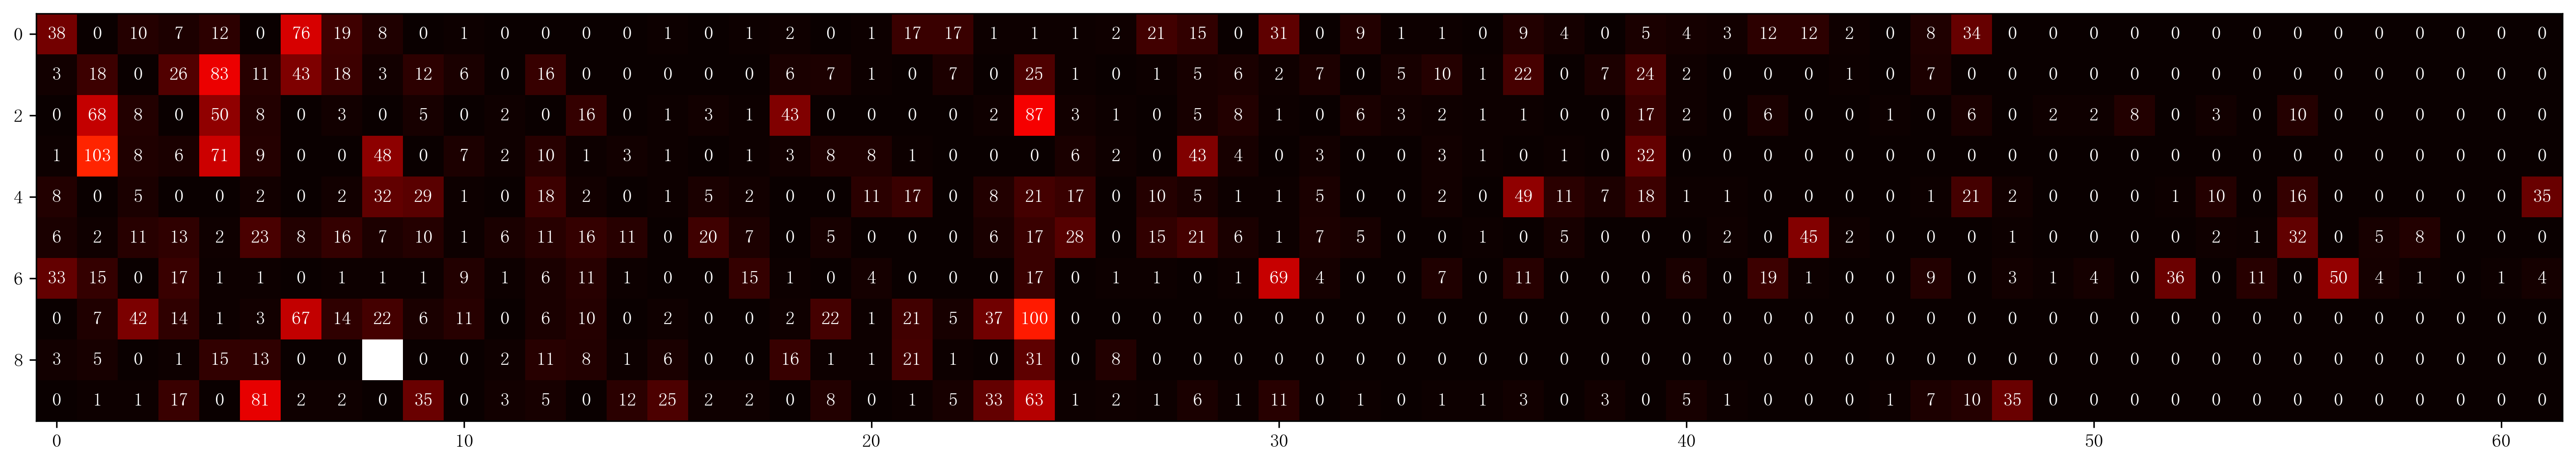

In [52]:
dir = "checkpoint/[ModelName=twingan]_[NumClient=10]_[Dataset=emnist]_[NumTask=5]_[IsNonIID=True]_[IsCondition=True]_[IsLayerNromTrue]_[IsFeatureExtra=False]_[ShareWay=kd]_[NumInnerLoop=5]_[Batch=20]/data_distribution.pkl"
data_distribute = pkl.load(open(dir, "rb"))
data_distribute
# counters = []
# for d in data_distribute:
#     counter = np.zeros(10)
#     for i in range(62):
#         counter[i] += d.count(i)
#     counters.append(counter)
# counters
import matplotlib.pyplot as plt
plt.figure(dpi=300,figsize=(24,8))
plt.imshow(torch.stack(data_distribute, dim=0).numpy(), cmap="hot", interpolation='nearest')
for i in range(10):
    for j in range(62):
        text = plt.text(j, i, int(data_distribute[i][j]*400), ha="center", va="center", color="w")
plt.show()

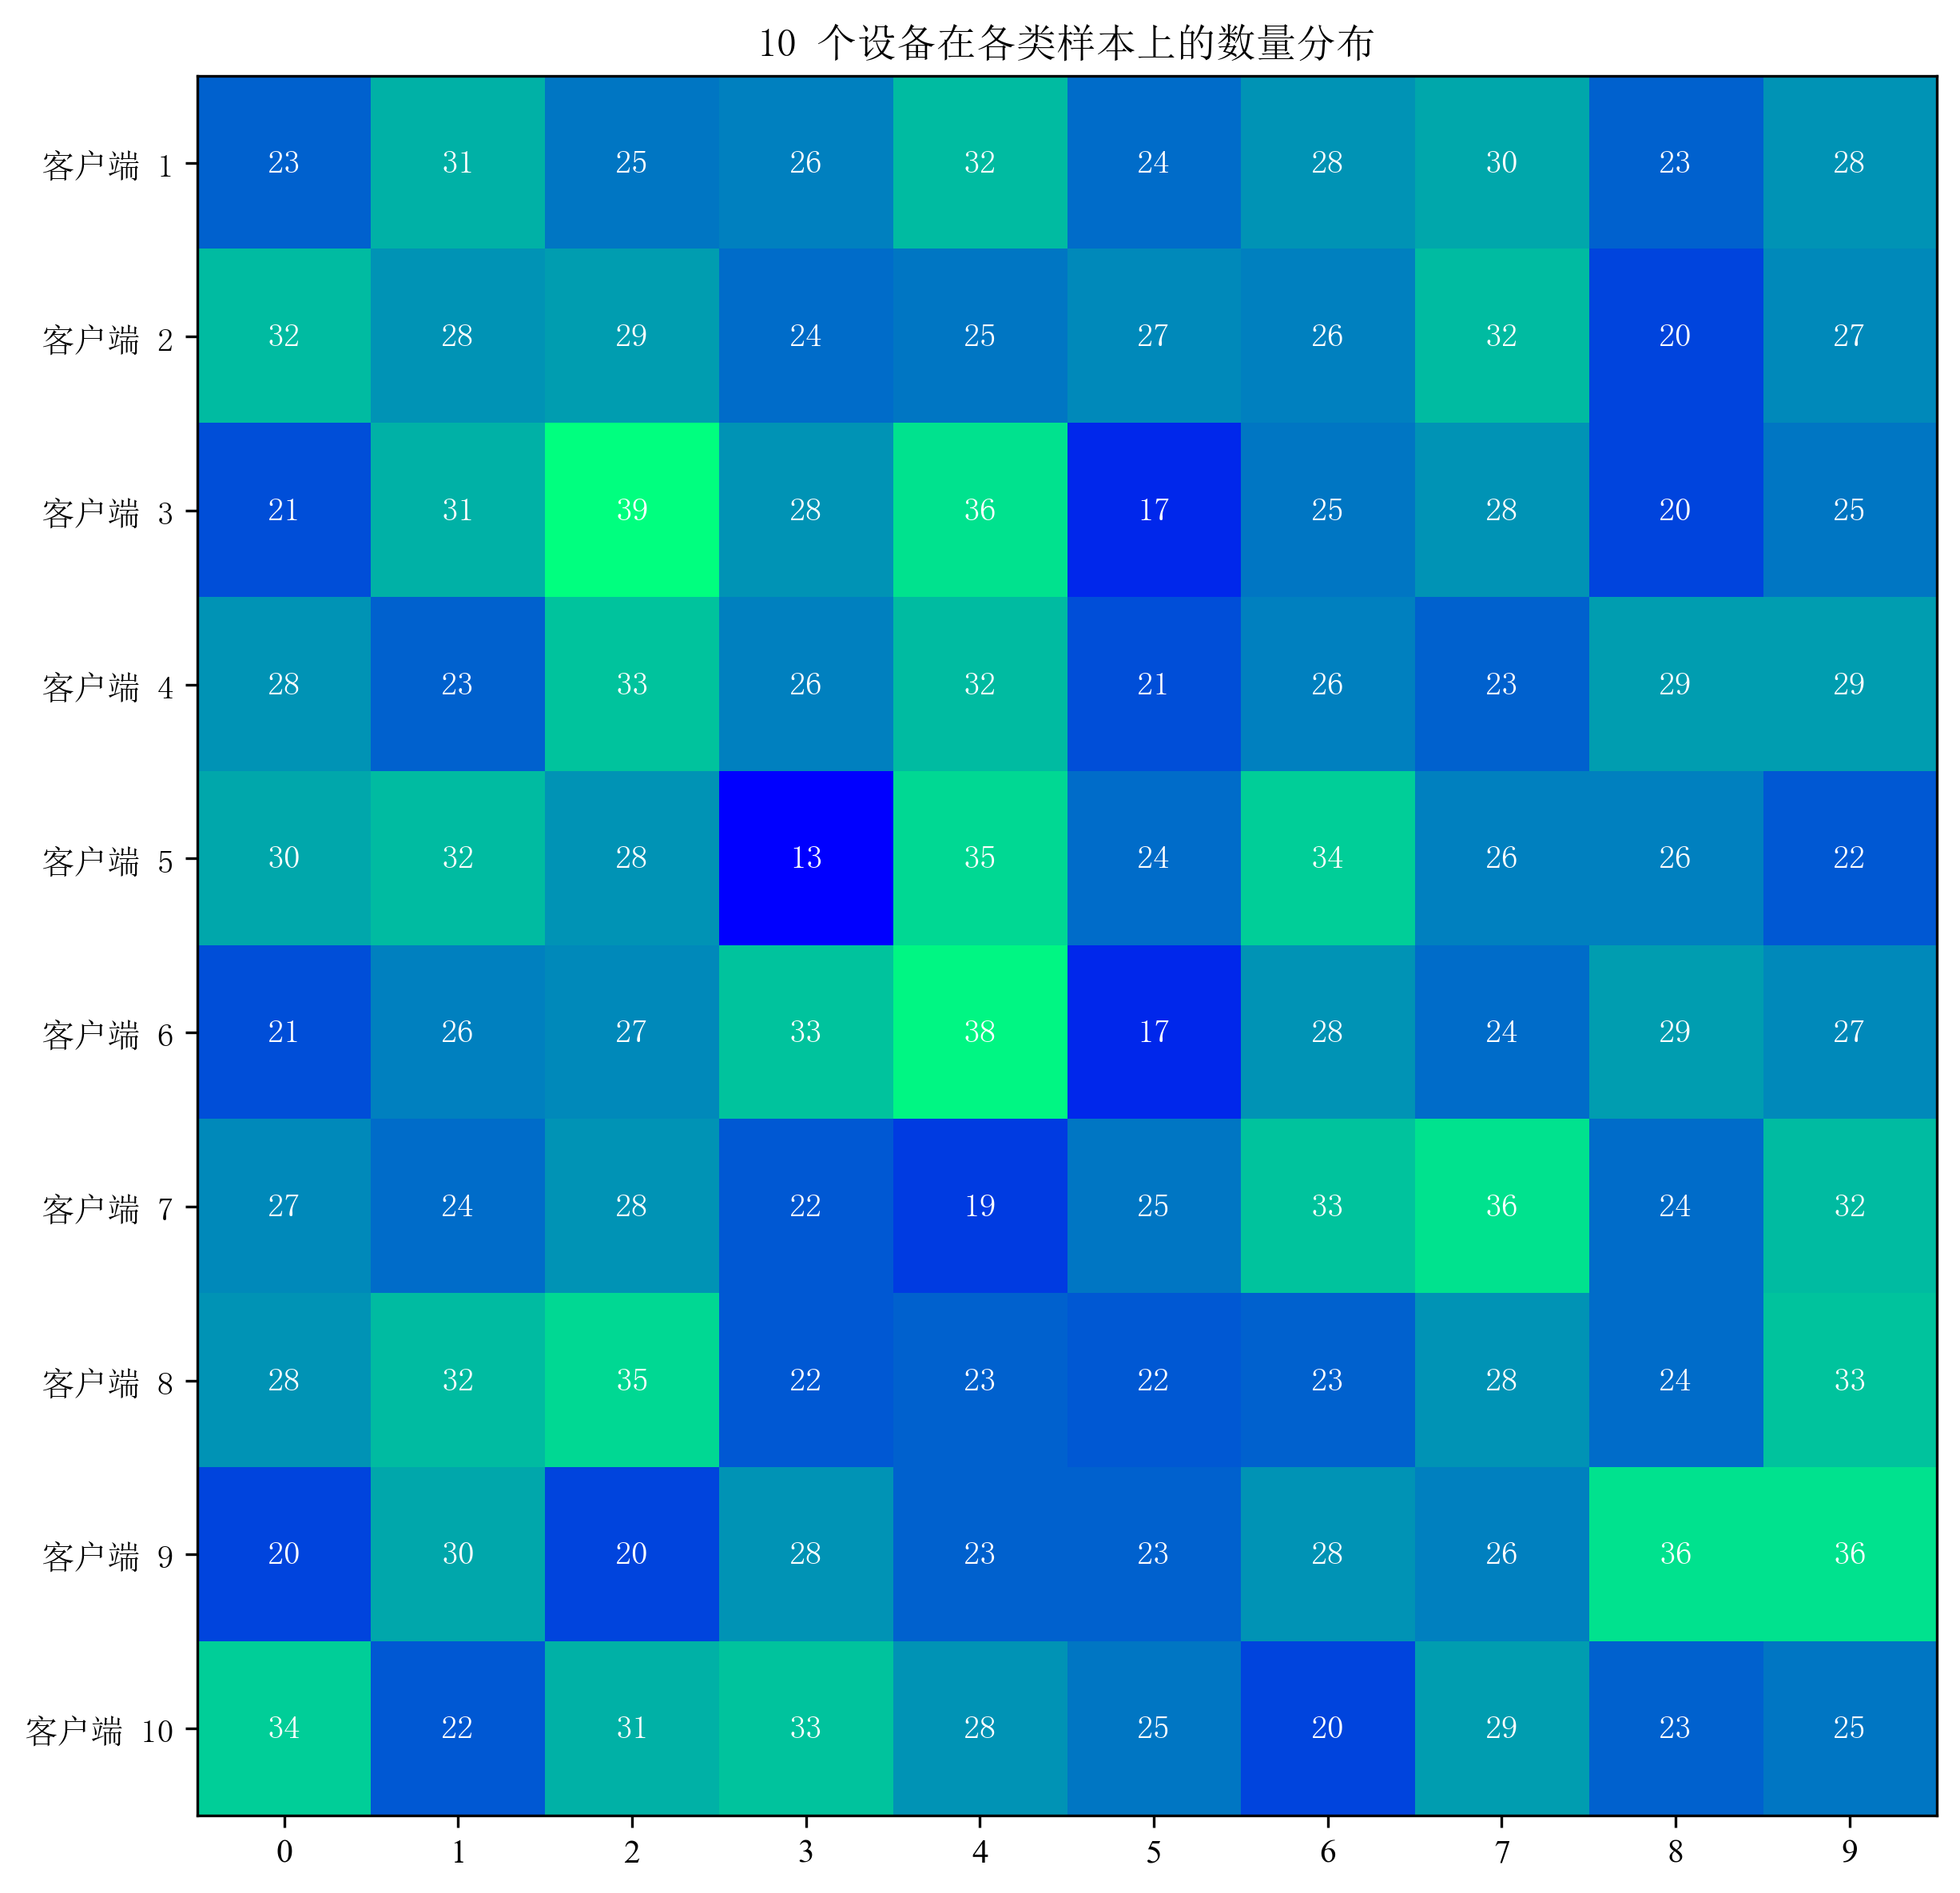

In [34]:
from datasets.EMNIST import EMNIST
import matplotlib.pyplot as plt
num_clients = 10
niid = False
dataset_name = "mnist"
dir_data = "data"
datasets = EMNIST(dir_data, num_clients, iid=not niid, dataset=dataset_name)

counters = []
for d in datasets.datasets_index:
    counter = np.zeros(10)
    for i in range(10):
        counter[i] += d.count(i)
    counters.append(counter)
counters

from utils import get_mApping
from matplotlib import rcParams
config = {
    "font.family":'serif',
    "font.size": 10,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
harvest = np.array(counters, dtype=int)
x = [f"{i}" for i in range(10)]
plt.figure(dpi=300,figsize=(24,8))

#
plt.xticks(np.arange(10), labels=x, fontproperties='Times New Roman', size=10)
plt.yticks(np.arange(10), labels=[f"客户端 {i+1}" for i in range(10)])
# plt.xlabel('Client Index')  # add x-axis label
# plt.ylabel('Class Index')  # add y-axis label
plt.title(f"10 个设备在各类样本上的数量分布")  # add title
cm = plt.cm.get_cmap('winter')
for i in range(10):
    for j in range(10):
        text = plt.text(j, i, harvest[i, j], ha="center", va="center", color="w")
plt.imshow(harvest, cmap=cm, interpolation='nearest')
# plt.colorbar(fraction=0.05, pad=0.05)  # add colorbar
plt.tight_layout()
# Save plot to log folder
plt.savefig(f"heatmap.jpg")
# plt.show()

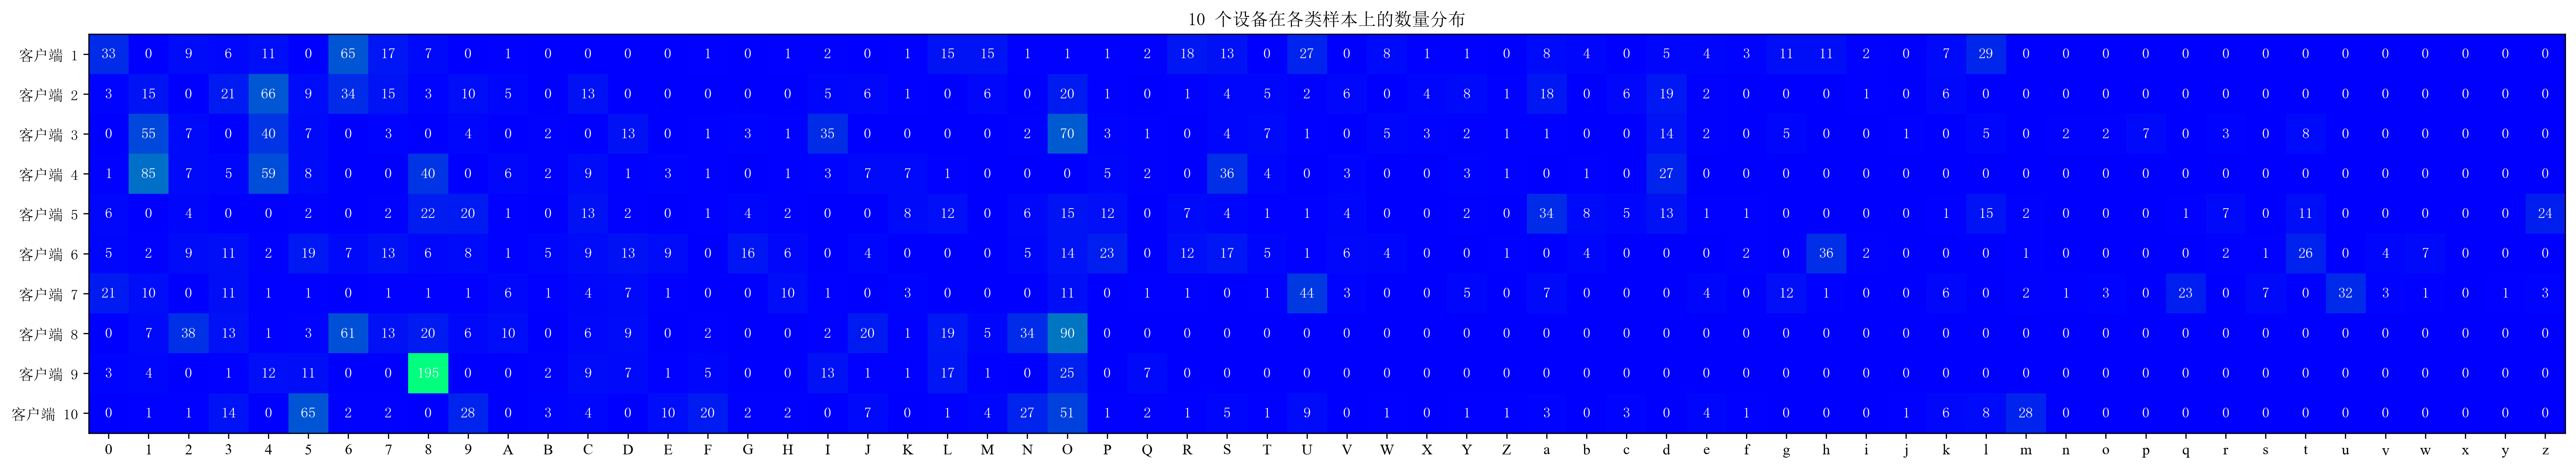

In [31]:
from datasets.EMNIST import EMNIST
import matplotlib.pyplot as plt
num_clients = 10
niid = True
dataset_name = "emnist"
dir_data = "data"
datasets = EMNIST(dir_data, num_clients, iid=not niid, dataset=dataset_name)

counters = []
for d in datasets.datasets_index:
    counter = np.zeros(62)
    for i in range(62):
        counter[i] += d.count(i)
    counters.append(counter)
counters
from utils import get_mApping
from matplotlib import rcParams

config = {
    "font.family":'serif',
    "font.size": 10,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
harvest = np.array(counters, dtype=int)
x = [get_mApping(i) for i in range(62)]
plt.figure(dpi=300,figsize=(24,8))

#
plt.xticks(np.arange(62), labels=x, fontproperties='Times New Roman', size=10)
plt.yticks(np.arange(10), labels=[f"客户端 {i+1}" for i in range(10)])
# plt.xlabel('Client Index')  # add x-axis label
# plt.ylabel('Class Index')  # add y-axis label
plt.title(f"10 个设备在各类样本上的数量分布")  # add title
cm = plt.cm.get_cmap('winter')
for i in range(10):
    for j in range(62):
        text = plt.text(j, i, harvest[i, j], ha="center", va="center", color="w")
plt.imshow(harvest, cmap=cm, interpolation='nearest')
# plt.colorbar(fraction=0.05, pad=0.05)  # add colorbar
plt.tight_layout()
# Save plot to log folder
plt.savefig(f"heatmap.jpg")
# plt.show()